# **Analisis Prediktif**: Prediksi Jenis Tanaman yang Cocok untuk Ditanam di Lahan Pertanian Tertentu
---
##### Proyek Submission 1 - Machine Learning Terapan
##### Oleh : Ni Made Yuli Cahyani
![precisionag2909-620x330](https://user-images.githubusercontent.com/71582007/139696754-c9faa3ef-58e3-40a0-80fe-dd50d36c2f05.jpg)

# **Pendahuluan**

Pada proyek ini, topik yang dibahas adalah mengenai `pertanian` dimana pada proyek ini akan membangun model machine larning untuk memprediksi jenis tanaman yang cocok ditanam di lahan pertanian tertentu berdasarkan parameter kandungan N, P, K (Nitrogen, Fosfor, Kalium) pada lahan, curah hujan, huhu, kelembaban dan pH. Dengan adanya model machine learning ini, diharapkan dapat membantu dan memudahkan petani dalam mengambil keputusan tentang strategi pertanian khususnya dalam memilih jenis tanaman yang cocok untuk lahan mereka, sehingga dapat meminimalisir kesalahan penanaman serta dapat meningkatkan hasil produksi di sektor pertanian. 

# **1. Mengimpor library python yang dibutuhkan**

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# **2. Mengunduh Dataset**
Dataset link: https://drive.google.com/file/d/1HEBP8P5jsC2ghrkwaa5vk59iDqXaSWbv/view?usp=sharing

In [ ]:
# mengunduh dataset
gdd.download_file_from_google_drive(file_id='1HEBP8P5jsC2ghrkwaa5vk59iDqXaSWbv',
                                    dest_path='content/Crop_prediction.zip',
                                    unzip=True)

Unzipping...Done.


# **3.** ***Data Understanding***

### **3.1** ***Data Loading***

In [ ]:
# membaca dataset
data_path = "/content/content/Crop_prediction/Crop_prediction.csv"
dataset = pd.read_csv(data_path)
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**Observasi :** <br>
Output kode di atas memberikan informasi sebagai berikut:

*   Terdapat 2200 baris (records atau jumlah pengamatan) dalam dataset.
*   Terdapat 8 kolom yaitu: N, P, K, temperature, humidity, ph, rainfall, label.

In [ ]:
label = dataset["label"].drop_duplicates().values
label

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### **3.2** ***Exploratory Data Analysis*** **- Deskripsi Variabel**

**Deskripsi Variabel :** <br>
Berdasarkan informasi dari Kaggle, variabel-variabel pada Crop dataset adalah sebagai berikut:

1. N - rasio kandungan Nitrogen dalam tanah
2. P - rasio kandungan Fosfor dalam tanah
3. K - rasio kandungan Kalium dalam tanah
4. temperature - suhu dalam derajat Celcius
5. humidity - kelembaban relatif dalam %
6. ph - nilai ph tanah
7. rainfall - curah hujan dalam mm
8. label - label dari crop yang cocok untuk tumbuh di lahan pertanian berdasarkan variabel 1-7

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Observasi :** <br>
Output kode di atas memberikan informasi sebagai berikut:

* Terdapat 3 kolom numerik dengan tipe data int64, yaitu: N, P, K. Ini merupakan fitur numerik.
* Terdapat 4 kolom numerik dengan tipe data float64 yaitu: temperature, humidity, ph dan rainfall. Ini merupakan fitur numerik.
* Terdapat 1 kolom dengan tipe object, yaitu: label. Kolom ini merupakan categorical features (fitur non-numerik) dimana kolom ini merupakan target fitur.

In [ ]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Observasi :** <br>
Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:

* count  adalah jumlah sampel pada data.
* mean adalah nilai rata-rata.
* std adalah standar deviasi.
* min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

In [ ]:
dataset.shape

(2200, 8)

### **3.3** ***Exploratory Data Analysis*** **- Memeriksa Missing Value**

In [ ]:
# memeriksa apakah terdapat missing value pada dataset
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Observasi :** <br>
Output kode di atas memberikan informasi bahwa tidak terdapat *missing value* pada dataset.

### **3.4** ***Exploratory Data Analysis*** **- Univariate Analysis**

#### 3.4.1 Sebaran/distribusi data pada setiap fitur numerik

In [ ]:
#visualisasi data masing-masing fitur menggunakan histogram plot untuk mengetahui sebaran/distribusi data pada setiap fitur
features = dataset.columns[:-1]
for feature in features:
  figures = px.histogram(data_frame=dataset,
                        x=feature,
                        template='plotly_white',
                        marginal='box',
                        nbins=200,
                        color_discrete_sequence=["green"],
                        barmode='stack',
                        histfunc='count')

  title = "Sebaran/distribusi data pada fitur " + feature
  figures.update_layout(font_family='Open Sans',
                        title=dict(text=title, x=0.47, font=dict(color="#333",size=20)),
                        hoverlabel=dict(bgcolor='white'))

  figures.show()

**Observasi :** <br>
Berdasarkan hasil visualisasi data diatas, dapat terlihat sebaran atau distribusi data yang ada pada setiap fitur. Termasuk nilai minimum, median, maksimum, Q1, Q3, batas atas dan batas bawah. Selain itu dapat dilihat juga pada beberapa fitur masih terdapat nilai outliers.

#### 3.4.2 Sebaran/distribusi data pada fitur target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



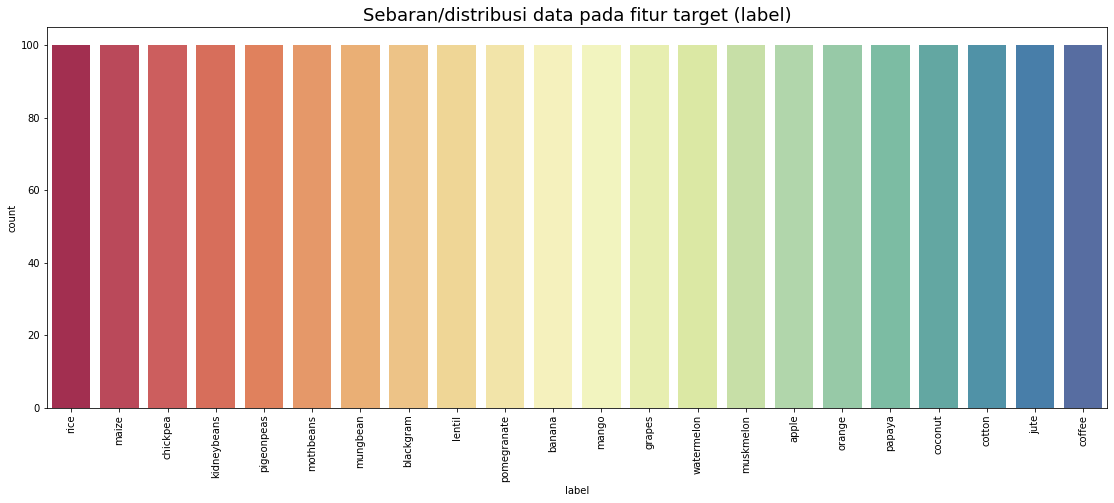

In [ ]:
#visualisasi data untuk mengetahui sebaran/distribusi data pada fitur target 'label'
plt.figure(figsize=(19,7))
sns.countplot(dataset['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.title("Sebaran/distribusi data pada fitur target (label)", fontdict= {'fontsize':18})
plt.show()

**Observasi :** <br>
Berdasarkan hasil visualisasi dari fitur target 'label' dapat memberikan informasi bahwa dataset sudah seimbang dengan jumlah sampel masing-masing label yaitu 100 sampel, sehingga tidak perlu menyeimbangkan data lagi.

### **3.5** ***Exploratory Data Analysis*** **- Multivariate Analysis**

#### 3.5.1 Mengecek dan Membandingkan rata rata kandungan fitur N, P, K antar label

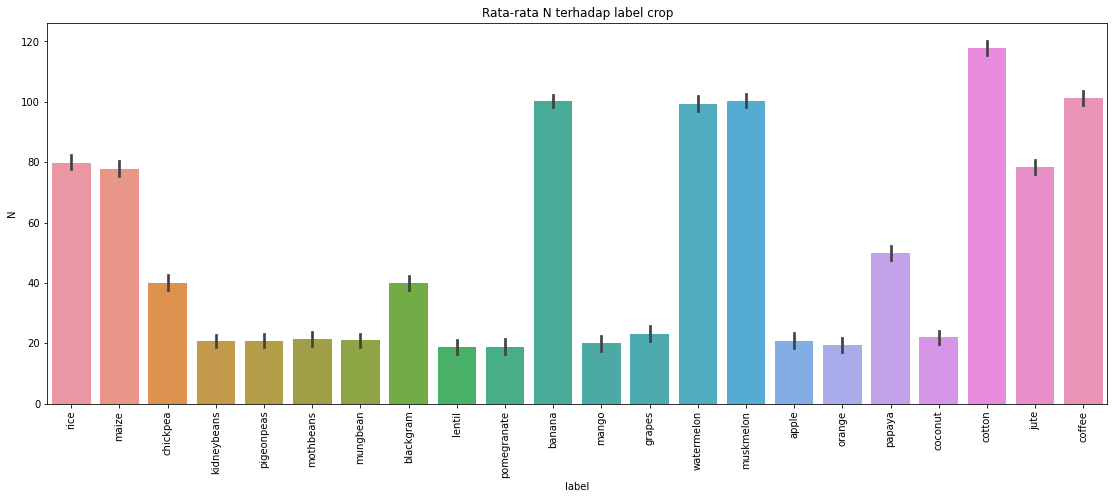

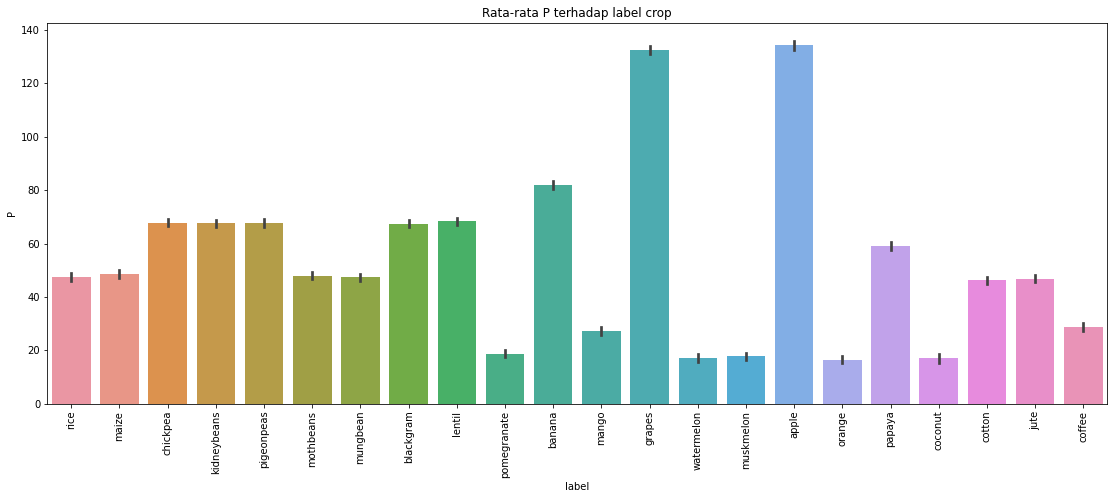

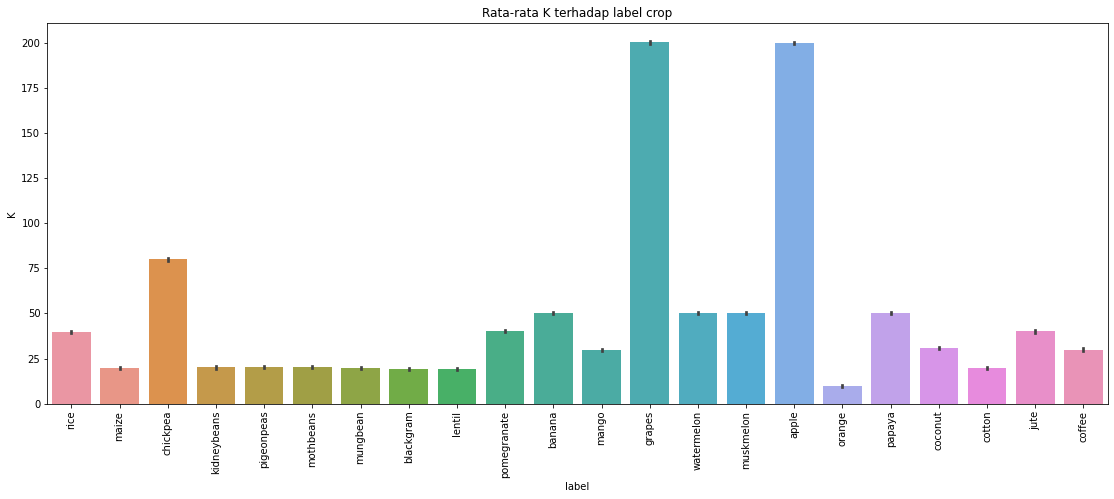

In [ ]:
crop_summary = pd.pivot_table(dataset, index=['label'],aggfunc='mean')

# visualisasi kandungan N, P, K terhadap setiap label
for feature in features[:3]:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = feature, data = dataset)
    plt.xticks(rotation=90)
    plt.title(f"Rata-rata {feature} terhadap label crop")
    plt.show()

    crop_summary_feature = crop_summary.sort_values(by=feature, ascending=False)
  
    fig = make_subplots(rows=1, cols=2)

    top = {
        'y' : crop_summary_feature[feature][0:11].sort_values().index,
        'x' : crop_summary_feature[feature][0:11].sort_values()
    }

    last = {
        'y' : crop_summary_feature[feature][-11:].index,
        'x' : crop_summary_feature[feature][-11:]
    }

    fig.add_trace(
        go.Bar(top,
              name="crop label dengan kandungan " + feature + " tinggi",
              marker_color='green',
              orientation='h',
              text=top['x']),
        
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(last,
              name="crop label dengan kandungan " + feature + " rendah",
              marker_color='red',
              orientation='h',
              text=last['x']),
        row=1, col=2
    )


    fig.update_traces(texttemplate='%{text}', textposition='inside')
    fig.update_layout(title_text=feature,
                      plot_bgcolor='white',
                      font_size=12, 
                      font_color='black',
                    height=500)

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [ ]:
# visualisasi perbandingan kandungan fitur N, P, K antar label
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='N',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='P',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='K',
    marker_color='crimson'
))

fig.update_layout(title="Perbandingan kandungan N, P, K antar label",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

**Observasi :** <br>
Hasil visualisasi di atas memberikan informasi mengenai rata-rata kandungan N, P, K terhadap setiap label crop. Dimana dapat dilihat bahwa terdapat beberapa label crop yang membutuhkan lahan dengan kandungan N,P,K tinggi dan beberapa label membutuhkan lahan dengan kandungan N,P,K rendah.

#### 3.5.2 Mengecek dan Membandingkan rata rata tingkat temperature, humidity dan rainfall antar setiap label

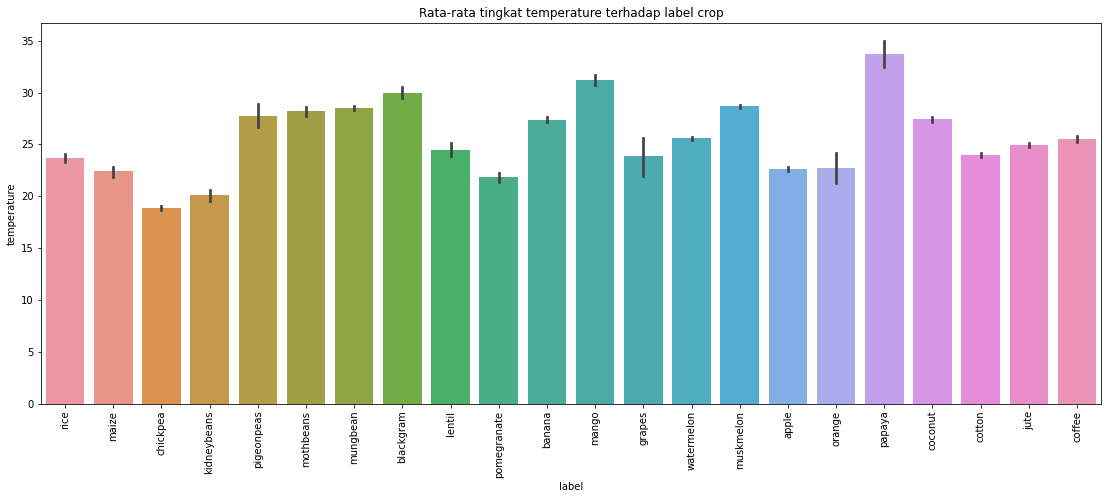

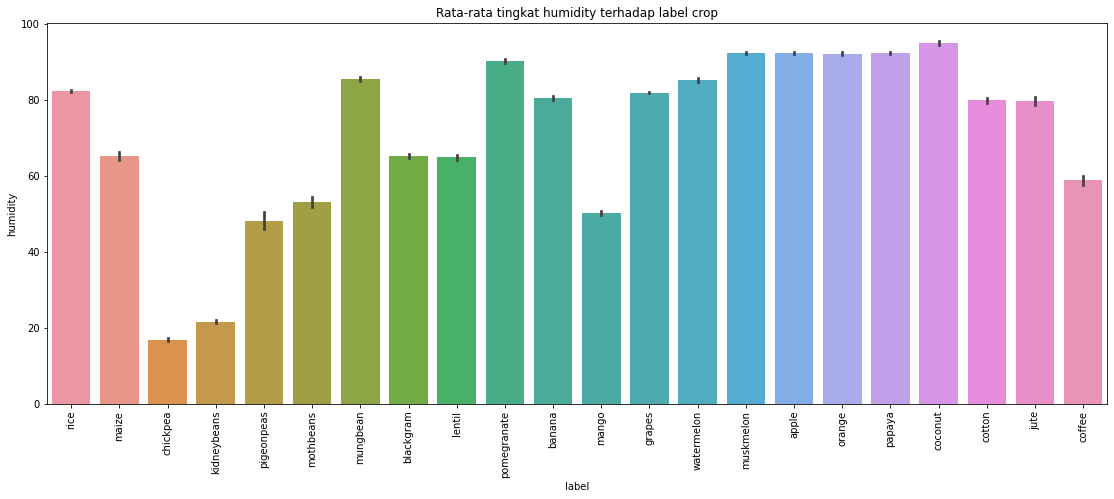

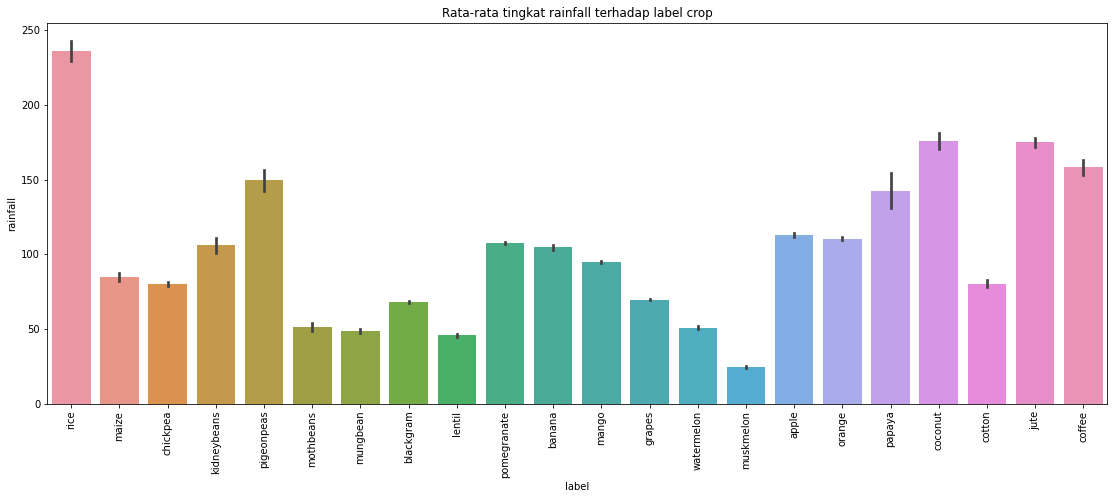

In [ ]:
# visualisasi tingkat temperature, humidity dan rainfall terhadap setiap label
features1 = features.delete(5)
for feature in features1[-3:]:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = feature, data = dataset)
    plt.xticks(rotation=90)
    plt.title(f"Rata-rata tingkat {feature} terhadap label crop")
    plt.show()

    crop_summary_feature = crop_summary.sort_values(by=feature, ascending=False)
  
    fig = make_subplots(rows=1, cols=2)

    top = {
        'y' : crop_summary_feature[feature][0:11].sort_values().index,
        'x' : crop_summary_feature[feature][0:11].sort_values()
    }

    last = {
        'y' : crop_summary_feature[feature][-11:].index,
        'x' : crop_summary_feature[feature][-11:]
    }

    fig.add_trace(
        go.Bar(top,
              name="crop label dengan tingkat " + feature + " tinggi",
              marker_color='green',
              orientation='h',
              text=top['x']),
        
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(last,
              name="crop label dengan tingkat " + feature + " rendah",
              marker_color='red',
              orientation='h',
              text=last['x']),
        row=1, col=2
    )


    fig.update_traces(texttemplate='%{text}', textposition='inside')
    fig.update_layout(title_text=feature,
                      plot_bgcolor='white',
                      font_size=12, 
                      font_color='black',
                    height=500)

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [ ]:
# visualisasi perbandingan tingkat temperature, humidity dan rainfall antar setiap label
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['temperature'],
    name='tepmerature',
    marker_color='coral'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['humidity'],
    name='humidity',
    marker_color='maroon'
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['rainfall'],
    name='rainfall',
    marker_color='orangered'
))

fig.update_layout(title="Perbandingan tingkat temperature, humidity dan rainfall antar label",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

**Observasi :** <br>
Hasil visualisasi di atas memberikan informasi mengenai tingkat temperature, humidity dan rainfall terhadap setiap label crop. Dimana dapat dilihat bahwa terdapat beberapa label crop yang membutuhkan lahan dengan tingkat temperature, humidity dan rainfall tinggi dan beberapa label membutuhkan lahan dengan tingkat temperature, humidity dan rainfall rendah.

#### 3.5.5 Korelasi antar fitur numerik

<Figure size 1368x1224 with 0 Axes>

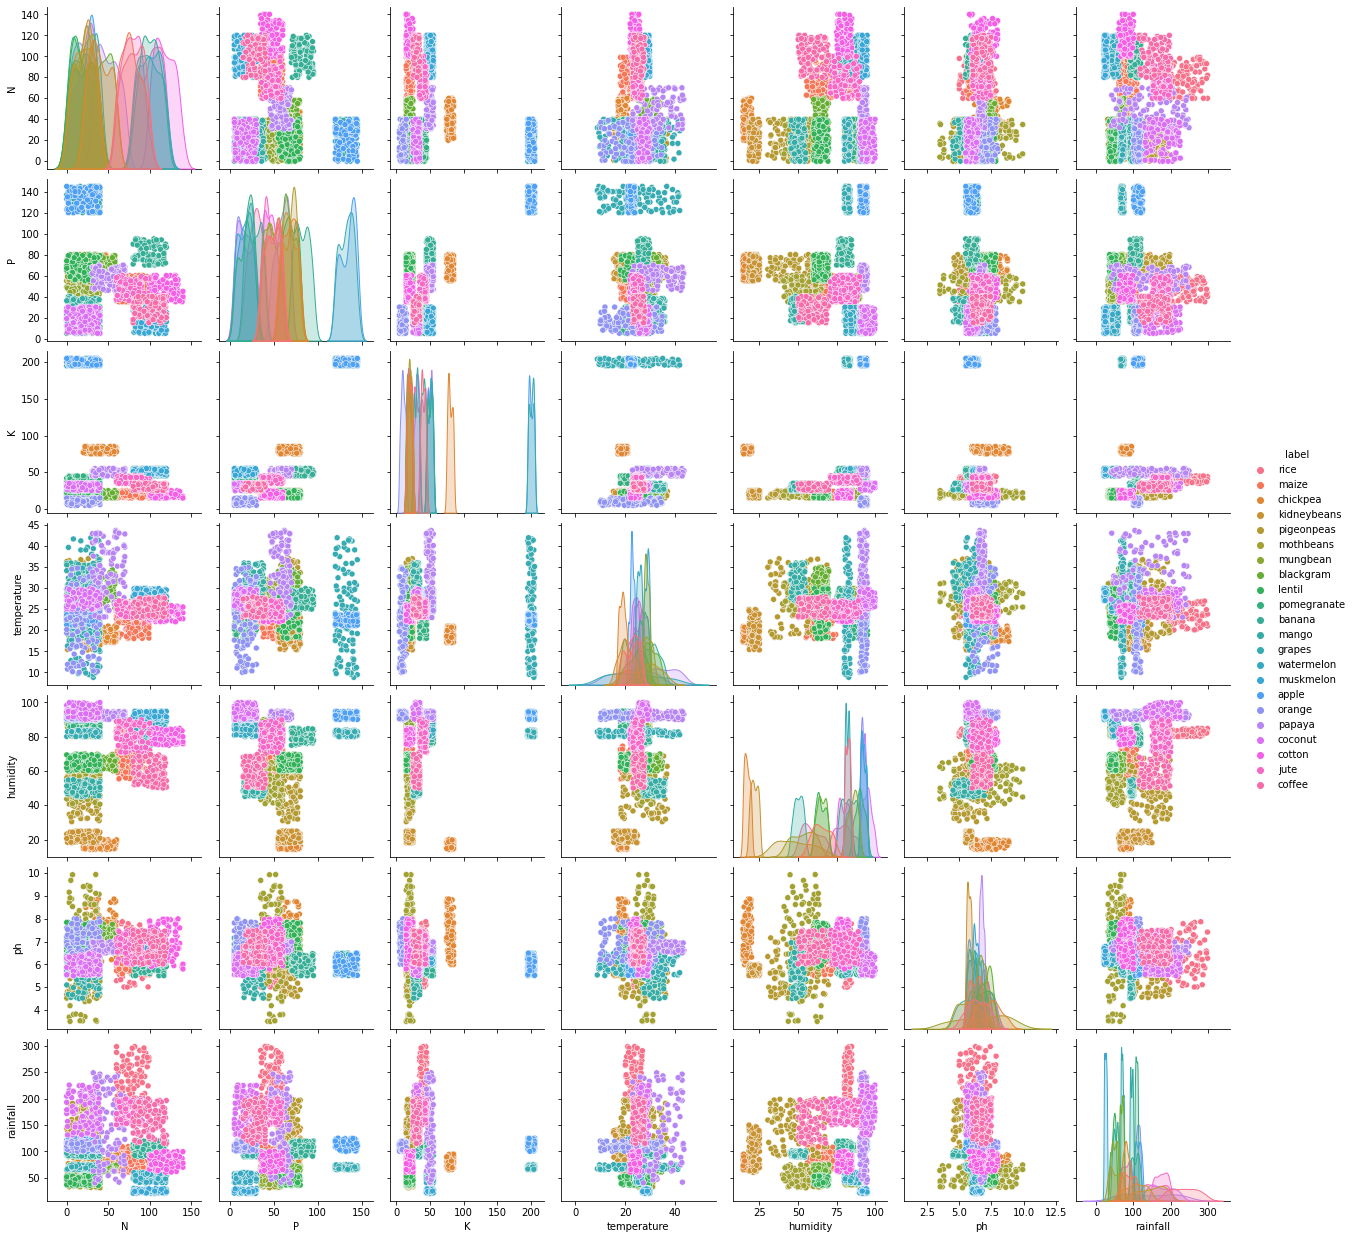

In [ ]:
# korelasi antar fitur numerik menggunakan fungsi pairplot
plt.figure(figsize=(19,17))
sns.pairplot(dataset, hue = "label")
plt.show()

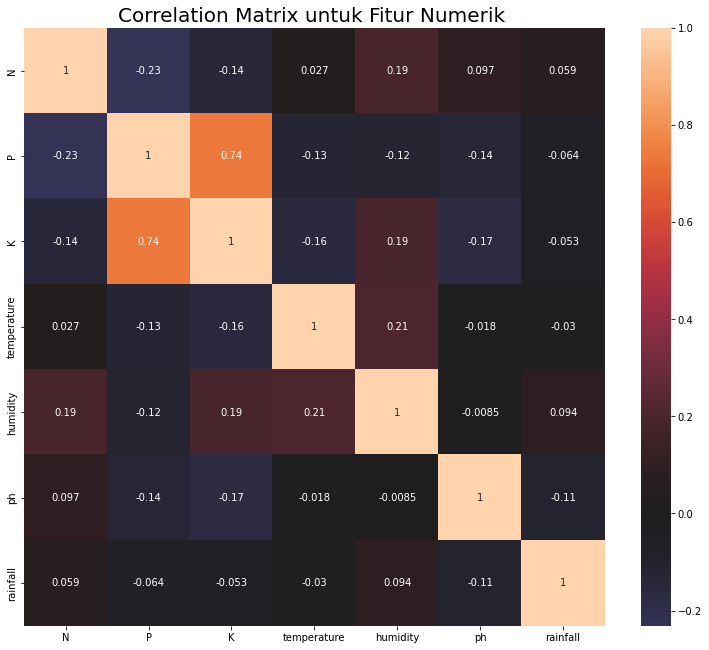

In [ ]:
# korelasi antara fitur numerik menggunakan fungsi corr()
plt.figure(figsize = (13,11))
sns.heatmap(dataset.corr(), center = 0, annot = True)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

**Observasi :** <br>
Kode di atas memberikan informasi mengenai korelasi antara fitur numerik, dimana dari Correlation Matrix dapat dilihat bahwa fitur P dan K memiliki korelasi yang sedikit tinggi.

# **4.** ***Data Preparation***

### **4.1 Melakukan label encoding pada fitur target (label)**

In [ ]:
# memisahkan dataset menjadi data X (variabel independen) dan data y (variabel dependen)
# mengubah value pada fitur target 'label' dari kategorik menjadi numerik menggunakan LabelEncoder()
label_encoder = LabelEncoder()
X = dataset[features]
y = label_encoder.fit_transform(dataset["label"])

label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

**Observasi :** <br>
Sebelum masuk ke tahap pembagian dataset, terlabih dahulu melakukan pemisahan antara variabel independen (N, P, K, temperature, humidity, ph, rainfall) sebagai data X dan variabel dependen (label) sebagai data y. Karena fitur label pada dataset merupakan fitur non-numerik yang berarti nilai pada fitur tersebut adalah kategorikal, maka sebelum dimasukan ke dalam data y telah dilakukan proses label encoding untuk fitur tersebut. Label encoding merupakan teknik untuk mengubah jenis data kategorikal menjadi data numerik yang dapat dipahami model.

### **4.2 Melakukan pembagian data pada dataset**

In [ ]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 2200
Total jumlah sample pada train dataset: 1760
Total jumlah sample pada test dataset: 440


**Observasi :** <br>
Pembagian dataset dilakukan dengan presentase 80% data latih dan 20% data uji, dimana jumlah sampel pada data train yaitu 1760 sampel dan jumlah sampel pada data test yaitu 440 sampel.

### **4.3 Mengatasi Outliers pada data train dengan metode LOF _(Local Outlier Factor)_**

In [ ]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# mengecek shape dari data train setelah menghilangkan outlier
X_train.shape

(1758, 7)

**Observasi :** <br>
Data pencilan (outliers) merupakan nilai yang tidak normal pada dataset. Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya sehingga dapat menyebabkan pada pembuatan model menjadi kurang optimal. Oleh karena itu, untuk menangani ouliers pada proyek ini menerapkan metode Local Outlier Factor untuk mengidentifikasi outliers dan kemudian menghapusnya dari data train, sehingga jumlah sampelnya menjadi 1758 sampel.

### **4.4 Standarisasi data pada fitur numerik**

In [ ]:
# melakukan standarisasi dengan fungsi StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.61210259,  2.08548477,  3.1467378 , ...,  0.87573133,
        -0.41393935,  0.25756555],
       [ 0.87299467, -0.51688253, -0.18767783, ...,  0.75470811,
        -0.14401626,  0.8808455 ],
       [ 1.12051088,  0.19567042, -0.24942626, ...,  0.83713832,
         0.7733441 ,  1.34177613],
       ...,
       [-0.39208818,  0.35057324, -0.66108252, ..., -0.31649529,
         0.05463209, -0.61721587],
       [-0.28208097,  0.3815538 , -0.49642001, ..., -0.07155479,
         1.47961669, -1.14569838],
       [-0.969626  , -0.95061041, -0.78457939, ...,  0.89292546,
         0.10636119,  0.1797856 ]])

In [ ]:
X_test

array([[ 1.5330379 , -1.19845492,  0.05931592, ...,  0.74178647,
        -0.04281651, -0.8002622 ],
       [ 1.14801268, -1.26041605, -0.02301533, ...,  0.64587051,
        -0.13307527, -1.01060703],
       [-0.969626  ,  2.11646533,  3.20848624, ...,  0.5691153 ,
        -0.3556926 , -0.52567594],
       ...,
       [ 1.86305951,  0.10272873, -0.66108252, ...,  0.27583543,
         1.09783758, -0.25393588],
       [-0.61210259,  0.35057324, -0.53758564, ..., -0.09092708,
         1.30878994, -0.54037021],
       [-0.50209538,  2.3952904 ,  3.10557218, ...,  0.96288965,
        -1.08135386,  0.31977697]])

**Observasi :** <br>
Setelah dilakukan standarisasi data, dapat dilihat bahwa semua nilai dari fitur numerik pada data train dan data test berada dalam skala data yang sama.

# **5.** ***Model Development***

### **5.1** ***Model Development - K-Nearest Neighbor***

In [ ]:
# mencari nilai k yang optimal
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(knn_predictions != y_test))

Accuracy at k = 1 is 0.9795454545454545
Accuracy at k = 2 is 0.9704545454545455
Accuracy at k = 3 is 0.975
Accuracy at k = 4 is 0.9795454545454545
Accuracy at k = 5 is 0.9795454545454545
Accuracy at k = 6 is 0.9681818181818181
Accuracy at k = 7 is 0.9727272727272728
Accuracy at k = 8 is 0.9704545454545455
Accuracy at k = 9 is 0.9613636363636363
Accuracy at k = 10 is 0.9659090909090909
Accuracy at k = 11 is 0.9636363636363636
Accuracy at k = 12 is 0.9590909090909091
Accuracy at k = 13 is 0.9590909090909091
Accuracy at k = 14 is 0.9613636363636363
Accuracy at k = 15 is 0.9613636363636363
Accuracy at k = 16 is 0.9636363636363636
Accuracy at k = 17 is 0.9636363636363636
Accuracy at k = 18 is 0.9613636363636363
Accuracy at k = 19 is 0.9568181818181818
Accuracy at k = 20 is 0.95
Accuracy at k = 21 is 0.9522727272727273
Accuracy at k = 22 is 0.9477272727272728
Accuracy at k = 23 is 0.9477272727272728
Accuracy at k = 24 is 0.9363636363636364
Accuracy at k = 25 is 0.9386363636363636
Accuracy at

Text(0, 0.5, 'Error Rate')

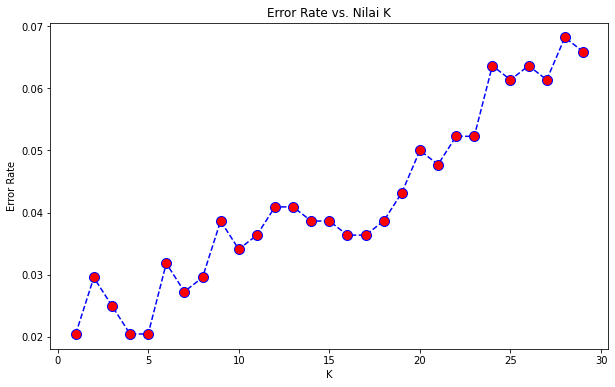

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# didapatkan nilai k optimal adalah 1
print("Minimum error:-",min(error_rate)," pada K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.020454545454545454  pada K = 1


In [ ]:
# membuat model dengan algoritma KKN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# menguji model menggunakan data test
knn_predictions = knn.predict(X_test)
knn_report = classification_report(y_test, knn_predictions, output_dict=True, target_names=label)
pd.DataFrame(knn_report).transpose()

,precision,recall,f1-score,support
rice,1.000000,1.000000,1.000000,18.000000
maize,1.000000,1.000000,1.000000,18.000000
chickpea,1.000000,1.000000,1.000000,22.000000
kidneybeans,1.000000,1.000000,1.000000,23.000000
pigeonpeas,1.000000,1.000000,1.000000,15.000000
mothbeans,1.000000,1.000000,1.000000,17.000000
mungbean,1.000000,0.937500,0.967742,16.000000
blackgram,1.000000,1.000000,1.000000,18.000000
lentil,0.833333,0.952381,0.888889,21.000000
pomegranate,0.952381,1.000000,0.975610,20.000000


**Observasi :** <br>
Dari code di atas dapat dilihat bahwa model dengan algoritma K-Nearest Neighbor memperoleh nilai akurasi yaitu sebesar 0.979545 dengan k = 1

### **5.2** ***Model Development - Random Forest***

In [ ]:
# membuat model dengan algoritma Random Forest
rf = RandomForestClassifier(random_state = 18)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=18, verbose=0,
                       warm_start=False)

In [ ]:
# menguji model menggunakan data test
rf_predictions = rf.predict(X_test)
rf_report = classification_report(y_test, rf_predictions, output_dict=True, target_names=label)
pd.DataFrame(rf_report).transpose()

,precision,recall,f1-score,support
rice,1.000000,1.000000,1.000000,18.000000
maize,1.000000,1.000000,1.000000,18.000000
chickpea,1.000000,1.000000,1.000000,22.000000
kidneybeans,1.000000,1.000000,1.000000,23.000000
pigeonpeas,1.000000,1.000000,1.000000,15.000000
mothbeans,1.000000,1.000000,1.000000,17.000000
mungbean,1.000000,1.000000,1.000000,16.000000
blackgram,1.000000,1.000000,1.000000,18.000000
lentil,0.954545,1.000000,0.976744,21.000000
pomegranate,1.000000,1.000000,1.000000,20.000000


**Observasi :** <br>
Dari code di atas dapat dilihat bahwa model dengan algoritma Random Forest memperoleh nilai akurasi yaitu sebesar 0.997727

### **5.3** ***Model Development - XGBoost Algorithm***

In [ ]:
# membuat model dengan algoritma XGBoost
xgb = XGBClassifier(random_state = 18)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=18,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# menguji model menggunakan data test
xgb_predictions = xgb.predict(X_test)
xgb_report = classification_report(y_test, xgb_predictions, output_dict=True, target_names=label)
pd.DataFrame(xgb_report).transpose()

,precision,recall,f1-score,support
rice,1.000000,1.000000,1.000000,18.000000
maize,1.000000,1.000000,1.000000,18.000000
chickpea,1.000000,1.000000,1.000000,22.000000
kidneybeans,1.000000,1.000000,1.000000,23.000000
pigeonpeas,1.000000,1.000000,1.000000,15.000000
mothbeans,1.000000,1.000000,1.000000,17.000000
mungbean,1.000000,1.000000,1.000000,16.000000
blackgram,1.000000,1.000000,1.000000,18.000000
lentil,0.954545,1.000000,0.976744,21.000000
pomegranate,1.000000,1.000000,1.000000,20.000000


**Observasi :** <br>
Dari code di atas dapat dilihat bahwa model dengan algoritma XGBoost memperoleh nilai akurasi yaitu sebesar 0.995455

# **6. Evaluasi Model**

### **6.1** ***Confusion Matrix - K-Nearest Neighbor***

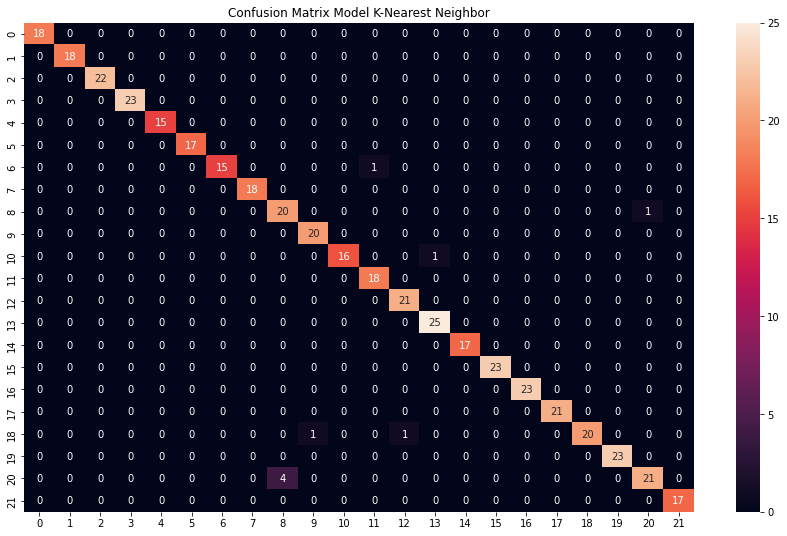

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot = True)
plt.title("Confusion Matrix Model K-Nearest Neighbor")
plt.show()

### **6.2** ***Confusion Matrix - Random Forest***

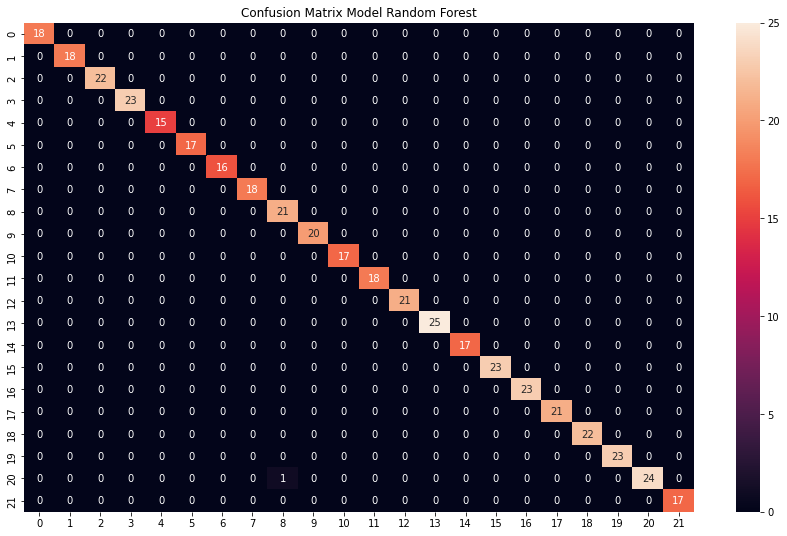

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot = True)
plt.title("Confusion Matrix Model Random Forest")
plt.show()

### **6.3** ***Confusion Matrix - XGBoost Algorithm***

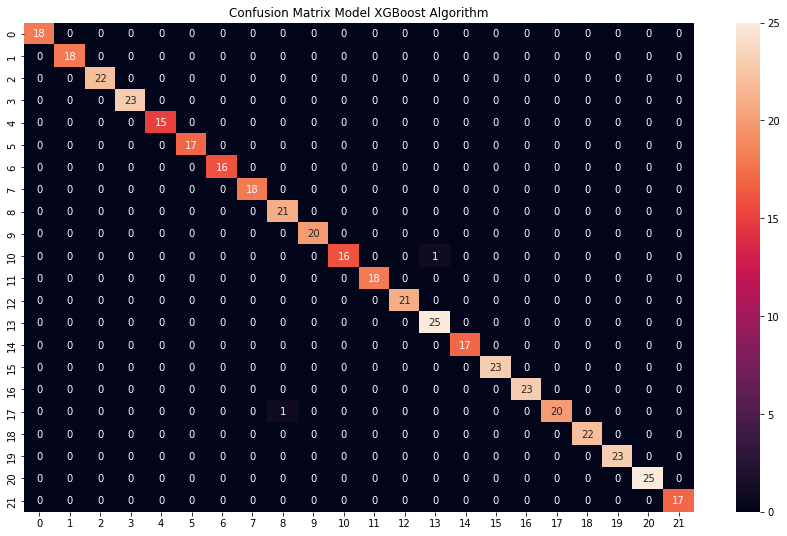

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot = True)
plt.title("Confusion Matrix Model XGBoost Algorithm")
plt.show()

### **6.4 Perbandingan Metriks Accuracy antar Model**

In [ ]:
#menghitung nilai akurasi, precision dan recall setiap model
knn_accuracy = round((accuracy_score(y_test, knn_predictions)*100), 2)
rf_accuracy = round((accuracy_score(y_test, rf_predictions)*100), 2)
xgb_accuracy = round((accuracy_score(y_test, xgb_predictions)*100), 2)

knn_precision = round((precision_score(y_test, knn_predictions, average='macro')*100), 2)
rf_precision = round((precision_score(y_test, rf_predictions, average='macro')*100), 2)
xgb_precision = round((precision_score(y_test, xgb_predictions, average='macro')*100), 2)

knn_recall = round((recall_score(y_test, knn_predictions, average='macro')*100), 2)
rf_recall = round((recall_score(y_test, rf_predictions, average='macro')*100), 2)
xgb_recall = round((recall_score(y_test, xgb_predictions, average='macro')*100), 2)

In [ ]:
# membat dataframe hasil evaluasi
list_evaluasi= [[knn_accuracy, knn_precision, knn_recall],
            [rf_accuracy, rf_precision, rf_recall],
            [xgb_accuracy, xgb_precision, xgb_recall]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)', 'Precision (%)', 'Recall (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'XGBoost'])
evaluasi

,Accuracy (%),Precision (%),Recall (%)
K-Nearest Neighbor,97.95,98.20,98.09
Random Forest,99.77,99.79,99.82
XGBoost,99.55,99.62,99.52


**Observasi :** <br>
Dari hasil evaluasi di atas dapat memberikan informasi bahwa ketiga model yang dibangun memiliki performa di atas 80%. Dimana dapat dilihat juga bahwa model dengan algoritma Random Forest memiliki performa (nilai akurasi, precision, recall, dan F1 score) yang lebih baik dari dua model lainnya yaitu model dengan algoritma K-Nearest Neighbor dan XGBoost. 

# **Penutup**

Model untuk memprediksi jenis tanaman yang cocok ditanam di lahan pertanian tertentu telah selesai dibuat dan dari hasil pengujian, ketiga model yang dibuat memiliki performa yang baik dan dapat digunakan untuk memprediksi data sebenarnya.


### *Referensi*
- https://www.kaggle.com/harshavarshney/crop-recommendation#EXPLORATORY-DATA-ANALYSIS
- https://www.kaggle.com/venugopalkadamba/croprecommendation-eda-visualization-modeling-99#XGBoost-Classifier
- https://www.kaggle.com/njain5/crop-prediction-using-classification-models
- https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
- https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826